# *Step1*:Data preprocessing

##step1-1: importing the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Step 1-2: Importing the main dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

FileNotFoundError: ignored

##step 1-3: encoding categorical variables

In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 401 kB/s 


In [ ]:
import category_encoders as ce
import pandas as pd

# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Geography','Gender'],return_df=True,mapping=[{'col':'Geography','mapping':{'France':1,'Spain':2,'Germany':3}},{'col':'Gender','mapping':{'Female':1,'Male':2}}])
dataset_encode = encoder.fit_transform(dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##step 1-4: standardizing the varaibles for clustering 

In [ ]:
X = dataset_encode.iloc[:, 3:13].values
y = dataset_encode.iloc[:, -1].values

In [ ]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,619.0,1.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,1.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,1.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1.0,2.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,1.0,2.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,1.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,3.0,2.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [ ]:
X1=X.drop([1,2,3,4,7,8,9], axis=1)
X1

,0,5,6
0,619.0,0.00,1.0
1,608.0,83807.86,1.0
2,502.0,159660.80,3.0
3,699.0,0.00,2.0
4,850.0,125510.82,1.0
...,...,...,...
9995,771.0,0.00,2.0
9996,516.0,57369.61,1.0
9997,709.0,0.00,1.0
9998,772.0,75075.31,2.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data_scaled = min_max.fit(X1)
data_scaled = data_scaled.transform(X1)
data_scaled

array([[0.538     , 0.        , 0.        ],
       [0.516     , 0.33403148, 0.        ],
       [0.304     , 0.63635718, 0.66666667],
       ...,
       [0.718     , 0.        , 0.        ],
       [0.844     , 0.29922631, 0.33333333],
       [0.884     , 0.51870777, 0.        ]])

# **step2: clustering**

## Hierarchical clustering

### Drawing the dendrogram

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))

KeyboardInterrupt: ignored

### Using the dendrogram to find the optimal number of clusters

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.axhline(y=20, color='r', linestyle='--')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('distances')
plt.show()

### predicting the cluster for each observation

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_scaled)

step 2-4: merging and reordering dataset for classification

In [ ]:
dataset_classification = dataset_encode.iloc[:,3:14].values
df1=pd.DataFrame(X)
df2=pd.DataFrame(y_hc.reshape(len(y_hc),1))
df1 = df1.rename(columns={0: 'credit',1:'Geography',2:'gender',3:'age',4:'tenure',5:'balance',6:'num_prod',7:'has_credit',8:'is_active',9:'estimated_salary',10:'Exited'})
df2 = df2.rename(columns={0: 'cluster'})
result = pd.concat([df1, df2], axis=1)
cols=result.columns.tolist()
cols=cols[-1:]+cols[:-1]
dataset_classification=result[cols]

In [ ]:
dataset_classification

,cluster,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,1,619.0,1.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,2,608.0,2.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,2,502.0,1.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,3,699.0,1.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0,850.0,2.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,3,771.0,1.0,2.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,2,516.0,1.0,2.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,3,709.0,1.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0,772.0,3.0,2.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


## K-means clustering


### finding the optimal number of clusters(Elbow method with WCSS)

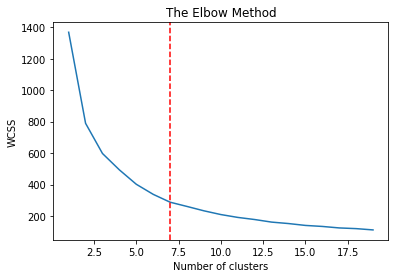

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.axvline(x=7, color='r', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### introducing k-means clustering 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_scaled)

### assigning the label of cluster to each 

In [ ]:
df1=pd.DataFrame(X)
df2=pd.DataFrame(y_kmeans.reshape(len(y_kmeans),1))
df1 = df1.rename(columns={0: 'credit',1:'Geography',2:'gender',3:'age',4:'tenure',5:'balance',6:'num_prod',7:'has_credit',8:'is_active',9:'estimated_salary',10:'Exited'})
df2 = df2.rename(columns={0: 'cluster'})
result = pd.concat([df1, df2], axis=1)
cols=result.columns.tolist()
cols=cols[-1:]+cols[:-1]
dataset_classification=result[cols]

In [ ]:
dataset_classification

,cluster,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,6,619.0,1.0,1.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,3,608.0,2.0,1.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1,502.0,1.0,1.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0,699.0,1.0,1.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,2,850.0,2.0,1.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,771.0,1.0,2.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,3,516.0,1.0,2.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,6,709.0,1.0,1.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,5,772.0,3.0,2.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


### implementation of cluster analysis

In [ ]:
#cluster analysis
cluster1=dataset_classification[dataset_classification.cluster==0]
cluster2=dataset_classification[dataset_classification.cluster==1]
cluster3=dataset_classification[dataset_classification.cluster==2]
cluster4=dataset_classification[dataset_classification.cluster==3]
cluster5=dataset_classification[dataset_classification.cluster==4]
cluster6=dataset_classification[dataset_classification.cluster==5]
cluster7=dataset_classification[dataset_classification.cluster==6]

In [ ]:
active_cluster1=np.mean(cluster1.is_active)
active_cluster2=np.mean(cluster2.is_active)
active_cluster3=np.mean(cluster3.is_active)
active_cluster4=np.mean(cluster4.is_active)
active_cluster5=np.mean(cluster5.is_active)
active_cluster6=np.mean(cluster6.is_active)
active_cluster7=np.mean(cluster7.is_active)
print(active_cluster1)
print(active_cluster6)
print(active_cluster3)
print(active_cluster5)
print(active_cluster2)
print(active_cluster4)
print(active_cluster7)

0.5460207612456748
0.526615969581749
0.5215962441314554
0.515309932785661
0.5133149678604224
0.4954175152749491
0.4841997961264016


In [ ]:
#salary comparison
salary_cluster1=np.mean(cluster1.estimated_salary)
salary_cluster2=np.mean(cluster2.estimated_salary)
salary_cluster3=np.mean(cluster3.estimated_salary)
salary_cluster4=np.mean(cluster4.estimated_salary)
salary_cluster5=np.mean(cluster5.estimated_salary)
salary_cluster6=np.mean(cluster6.estimated_salary)
salary_cluster7=np.mean(cluster7.estimated_salary)
print(salary_cluster2)
print(salary_cluster6)
print(salary_cluster1)
print(salary_cluster3)
print(salary_cluster7)
print(salary_cluster4)
print(salary_cluster5)

102804.27645546361
102789.20992395452
99846.816235294
99842.05963849768
99258.40501529051
99132.16035641568
98434.65135175508


In [ ]:
age_cluster1=np.mean(cluster1.age)
age_cluster2=np.mean(cluster2.age)
age_cluster3=np.mean(cluster3.age)
age_cluster4=np.mean(cluster4.age)
age_cluster5=np.mean(cluster5.age)
age_cluster6=np.mean(cluster6.age)
age_cluster7=np.mean(cluster7.age)
print(age_cluster7)
print(age_cluster4)
print(age_cluster3)
print(age_cluster2)
print(age_cluster6)
print(age_cluster1)
print(age_cluster5)


40.60754332313965
39.47606924643585
39.4037558685446
38.972451790633606
38.48669201520912
37.80968858131488
37.607916355489174


In [ ]:
credit_cluster1=np.mean(cluster1.credit)
credit_cluster2=np.mean(cluster2.credit)
credit_cluster3=np.mean(cluster3.credit)
credit_cluster4=np.mean(cluster4.credit)
credit_cluster5=np.mean(cluster5.credit)
credit_cluster6=np.mean(cluster6.credit)
credit_cluster7=np.mean(cluster7.credit)
print(credit_cluster6)
print(credit_cluster3)
print(credit_cluster1)
print(credit_cluster7)
print(credit_cluster2)
print(credit_cluster5)
print(credit_cluster4)


732.527566539924
726.4906103286385
725.9356401384083
646.5504587155963
575.8163452708907
569.0530246452577
567.7062118126273


In [ ]:
balance_cluster1=np.mean(cluster1.balance)
balance_cluster2=np.mean(cluster2.balance)
balance_cluster3=np.mean(cluster3.balance)
balance_cluster4=np.mean(cluster4.balance)
balance_cluster5=np.mean(cluster5.balance)
balance_cluster6=np.mean(cluster6.balance)
balance_cluster7=np.mean(cluster7.balance)
print(balance_cluster2)
print(balance_cluster6)
print(balance_cluster3)
print(balance_cluster4)
print(balance_cluster7)
print(balance_cluster1)
print(balance_cluster5)


121919.5765748392
121593.38762357415
121577.08905633794
121190.81536659885
4138.378318042813
1156.1329480968855
1093.2844660194173


In [ ]:
gender_cluster1=np.mean(cluster1.gender)
gender_cluster2=np.mean(cluster2.gender)
gender_cluster3=np.mean(cluster3.gender)
gender_cluster4=np.mean(cluster4.gender)
gender_cluster5=np.mean(cluster5.gender)
gender_cluster6=np.mean(cluster6.gender)
gender_cluster7=np.mean(cluster7.gender)
print(gender_cluster4)
print(gender_cluster5)
print(gender_cluster6)
print(gender_cluster3)
print(gender_cluster1)
print(gender_cluster7)
print(gender_cluster2)


1.5641547861507128
1.5586258401792383
1.5503802281368821
1.5469483568075117
1.5411764705882354
1.5198776758409787
1.5188246097337006


In [ ]:
product_cluster1=np.mean(cluster1.num_prod)
product_cluster2=np.mean(cluster2.num_prod)
product_cluster3=np.mean(cluster3.num_prod)
product_cluster4=np.mean(cluster4.num_prod)
product_cluster5=np.mean(cluster5.num_prod)
product_cluster6=np.mean(cluster6.num_prod)
product_cluster7=np.mean(cluster7.num_prod)
print(product_cluster2)
print(product_cluster6)
print(product_cluster1)
print(product_cluster5)
print(product_cluster3)
print(product_cluster4)
print(product_cluster7)


2.127640036730946
2.1074144486692017
2.0449826989619377
2.0448095593726663
1.0
1.0
1.0


In [ ]:
tenure_cluster1=np.mean(cluster1.tenure)
tenure_cluster2=np.mean(cluster2.tenure)
tenure_cluster3=np.mean(cluster3.tenure)
tenure_cluster4=np.mean(cluster4.tenure)
tenure_cluster5=np.mean(cluster5.tenure)
tenure_cluster6=np.mean(cluster6.tenure)
tenure_cluster7=np.mean(cluster7.tenure)
print(tenure_cluster1)
print(tenure_cluster2)
print(tenure_cluster3)
print(tenure_cluster4)
print(tenure_cluster5)
print(tenure_cluster6)
print(tenure_cluster7)

5.103806228373703
5.10376492194674
5.02112676056338
4.936863543788188
5.105302464525765
4.870722433460076
4.937818552497451



**result of clusters comparison**

1. the more salary, the more credit
2. the more salary, the more number of product
3. the more men we have in clusters than women
4. the more salary and number of product, the more active member we have in clusters
5. the younger , the higher income and the more usage in number of product

# **step 3: classification**

splitting data into test and train set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_classification, y, test_size = 0.25, random_state = 0)

In [ ]:
print("the precentage of 1 in the training dataset = ",sum(y_train)/len(y_train))

the precentage of 1 in the training dataset =  0.20373333333333332


ballancing dataset (training set)

In [ ]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
over = SMOTENC(categorical_features=[0,1,2,3,4,5,7,8,9], random_state=0,sampling_strategy=0.65)
X_train, y_train= over.fit_resample(X_train, y_train)

In [ ]:
print("the precentage of 1 in the training dataset after oversampling technique= ",sum(y_train)/len(y_train))

the precentage of 1 in the training dataset after oversampling technique=  0.39389018573023443


## step 3-1: classification without clustering

In [ ]:
X_WoC_train=X_train.drop(['cluster'], axis=1)
X_WoC_test=X_test.drop(['cluster'], axis=1)
y_WoC_train=y_train
y_WoC_test=y_test


In [ ]:
X_WoC_train

,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,579.0,3.0,1.0,39.0,5.0,117833.300000,3.0,0.0,0.0,5831.000000
1,750.0,1.0,1.0,32.0,5.0,0.000000,2.0,1.0,0.0,95611.470000
2,729.0,2.0,1.0,34.0,9.0,53299.960000,2.0,1.0,1.0,42855.970000
3,689.0,2.0,2.0,38.0,5.0,75075.140000,1.0,1.0,1.0,8651.920000
4,605.0,1.0,2.0,52.0,7.0,0.000000,2.0,1.0,1.0,173952.500000
...,...,...,...,...,...,...,...,...,...,...
9848,745.0,3.0,1.0,28.0,1.0,122267.588248,1.0,1.0,0.0,92748.669927
9849,643.0,1.0,2.0,40.0,5.0,0.000000,1.0,1.0,0.0,145287.369731
9850,745.0,3.0,1.0,37.0,2.0,111067.995853,1.0,1.0,1.0,38578.684381
9851,594.0,1.0,2.0,57.0,6.0,0.000000,1.0,1.0,0.0,18112.464025


### step 3-1-1: linear regression


step 3-1-1-1:fitting linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_WoC_train, y_WoC_train)

LogisticRegression(random_state=0)

step 3-1-1-2:make the prediction with linear regression

In [ ]:
y_WoC_pred = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred.reshape(len(y_WoC_pred),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


step 3-1-1-3:performance measure for linear regression

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_WoC_test, y_WoC_pred)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WoC_test, y_WoC_pred))
print('precsion score = %.4f' %precision_score(y_WoC_test, y_WoC_pred, average='binary'))
print('recall score = %.4f' %recall_score(y_WoC_test, y_WoC_pred))
print('f1 score = %.4f' %f1_score(y_WoC_test, y_WoC_pred))

confusion matrix : 
[[1641  350]
 [ 289  220]]
accuracy score = 0.7444
precsion score = 0.3860
recall score = 0.4322
f1 score = 0.4078


Feature: 0, Score: -0.00362
Feature: 1, Score: 0.03768
Feature: 2, Score: -0.03938
Feature: 3, Score: 0.05622
Feature: 4, Score: -0.10393
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.02844
Feature: 7, Score: -0.00330
Feature: 8, Score: -0.04036
Feature: 9, Score: -0.00000


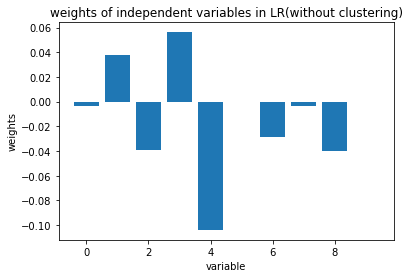

In [ ]:
from matplotlib import pyplot
importance = classifier.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in LR(without clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [ ]:
y_WoC_pred = classifier.predict_proba(X_WoC_test)[::,1]
fpr_LR, tpr_LR, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred)

### step 3-1-2: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_WoC_train, y_WoC_train)

GaussianNB()

In [ ]:
y_WoC_pred_NB = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred_NB.reshape(len(y_WoC_pred_NB),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WoC_test, y_WoC_pred_NB)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WoC_test, y_WoC_pred_NB))
print('precsion score = %.4f' %precision_score(y_WoC_test, y_WoC_pred_NB, average='binary'))
print('recall score = %.4f' %recall_score(y_WoC_test, y_WoC_pred_NB))
print('f1 score = %.4f' %f1_score(y_WoC_test, y_WoC_pred_NB))


confusion matrix : 
[[1710  281]
 [ 264  245]]
accuracy score = 0.7820
precsion score = 0.4658
recall score = 0.4813
f1 score = 0.4734


In [ ]:
y_WoC_pred_NB = classifier.predict_proba(X_WoC_test)[::,1]
fpr_NB, tpr_NB, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_NB)

### step 3-1-3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[20,30,40,50,60,70,80,90,100], 'max_depth': [20,21,22]}
classifier = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

NameError: ignored

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_

{'max_depth': 28}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=21, n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_WoC_train, y_WoC_train)

RandomForestClassifier(criterion='entropy', max_depth=21, random_state=0)

In [ ]:
y_WoC_pred_RF = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred_RF.reshape(len(y_WoC_pred_RF),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[1 0]
 [0 1]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WoC_test, y_WoC_pred_RF)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WoC_test, y_WoC_pred_RF))
print('precsion score = %.4f' %precision_score(y_WoC_test, y_WoC_pred_RF, average='binary'))
print('recall score = %.4f' %recall_score(y_WoC_test, y_WoC_pred_RF))
print('f1 score = %.4f' %f1_score(y_WoC_test, y_WoC_pred_RF))

confusion matrix : 
[[1786  205]
 [ 181  328]]
accuracy score = 0.8456
precsion score = 0.6154
recall score = 0.6444
f1 score = 0.6296


In [ ]:
y_WoC_pred_RF = classifier.predict_proba(X_WoC_test)[::,1]
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_RF)

Feature: 0, Score: 0.13577
Feature: 1, Score: 0.05177
Feature: 2, Score: 0.02357
Feature: 3, Score: 0.24000
Feature: 4, Score: 0.08726
Feature: 5, Score: 0.14681
Feature: 6, Score: 0.11274
Feature: 7, Score: 0.02030
Feature: 8, Score: 0.03340
Feature: 9, Score: 0.14837


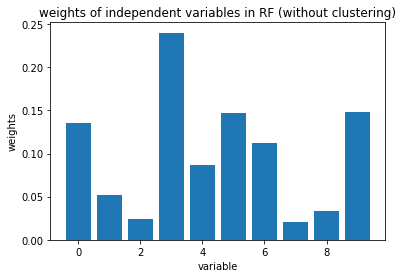

In [ ]:
importance = classifier.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in RF (without clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()

### step 3-1-4: XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid={'max_depth':[27,28,29,30,31]}
classifier = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [27, 28, 29, 30, 31]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
print(classifier.best_params_)

{'max_depth': 28}


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=28)
y_WoC_pred_XG=xgb.fit(X_WoC_train, y_WoC_train).predict(X_WoC_test)

In [ ]:
y_WoC_pred_XG = xgb.predict(X_WoC_test)
cm = confusion_matrix(y_WoC_test, y_WoC_pred_XG)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WoC_test, y_WoC_pred_XG))
print('precsion score = %.4f' %precision_score(y_WoC_test, y_WoC_pred_XG, average='binary'))
print('recall score = %.4f' %recall_score(y_WoC_test, y_WoC_pred_XG))
print('f1 score = %.4f' %f1_score(y_WoC_test, y_WoC_pred_XG))

confusion matrix : 
[[1776  215]
 [ 176  333]]
accuracy score = 0.8436
precsion score = 0.6077
recall score = 0.6542
f1 score = 0.6301


Feature: 0, Score: 0.02872
Feature: 1, Score: 0.06223
Feature: 2, Score: 0.04697
Feature: 3, Score: 0.10083
Feature: 4, Score: 0.03239
Feature: 5, Score: 0.04539
Feature: 6, Score: 0.50066
Feature: 7, Score: 0.02960
Feature: 8, Score: 0.12113
Feature: 9, Score: 0.03208


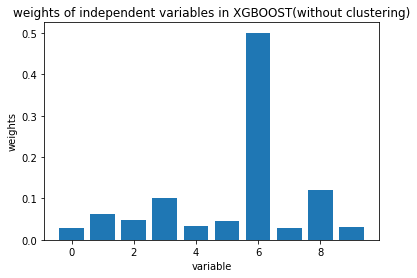

In [ ]:
importance = xgb.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in XGBOOST(without clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()

In [ ]:
y_WoC_pred_XG = xgb.predict_proba(X_WoC_test)[::,1]
fpr_XG, tpr_XG, _ = metrics.roc_curve(y_WoC_test,  y_WoC_pred_XG)

### step 3-1-6: SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={'kernel':['rbf', 'linear']}
classifier = GridSearchCV(estimator=SVC(),param_grid=param_grid)   
classifier.fit(X_WoC_train, y_WoC_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear']})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
print(classifier.best_params_)

{'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_WoC_train, y_WoC_train)

SVC(random_state=0)

In [ ]:
y_WoC_pred_svm = classifier.predict(X_WoC_test)
print(np.concatenate((y_WoC_pred_svm.reshape(len(y_WoC_pred_svm),1), y_WoC_test.reshape(len(y_WoC_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_WoC_test, y_WoC_pred_svm)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WoC_test, y_WoC_pred_svm))
print('precsion score = %.4f' %precision_score(y_WoC_test, y_WoC_pred_svm, average='binary'))
print('recall score = %.4f' %recall_score(y_WoC_test, y_WoC_pred_svm))
print('f1 score = %.4f' %f1_score(y_WoC_test, y_WoC_pred_svm))

confusion matrix : 
[[1725  266]
 [ 168  341]]
accuracy score = 0.8264
precsion score = 0.5618
recall score = 0.6699
f1 score = 0.6111


### step 3-1: ROC curve

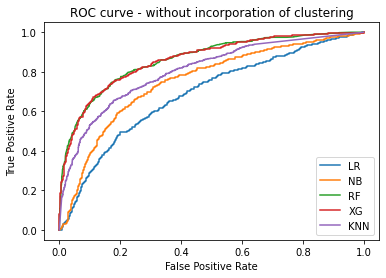

auc for LR without clustering = 0.6859
auc for NB without clustering = 0.7515
auc for RF without clustering = 0.8629
auc for XG without clustering = 0.8612
auc for KNN without clustering = 0.8049


In [ ]:
plt.plot(fpr_LR,tpr_LR,label="LR")
plt.plot(fpr_NB,tpr_NB,label="NB")
plt.plot(fpr_RF,tpr_RF,label="RF")
plt.plot(fpr_XG, tpr_XG,label="XG")
#plt.plot(fpr_SVM, tpr_SVM) 
plt.legend()
plt.title('ROC curve - without incorporation of clustering')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('auc for LR without clustering = %.4f'%metrics.auc(fpr_LR,tpr_LR))
print('auc for NB without clustering = %.4f'%metrics.auc(fpr_NB,tpr_NB))
print('auc for RF without clustering = %.4f'%metrics.auc(fpr_RF,tpr_RF))
print('auc for XG without clustering = %.4f'%metrics.auc(fpr_XG,tpr_XG))
print('auc for KNN without clustering = %.4f'%metrics.auc(fpr_KNN,tpr_KNN))


## step 3-2:classification with clustering 

In [ ]:
X_WC_train = X_train
X_WC_test = X_test
y_WC_train = y_WoC_train
y_WC_test = y_WoC_test

In [ ]:
X_WC_train

,cluster,credit,Geography,gender,age,tenure,balance,num_prod,has_credit,is_active,estimated_salary
0,1,579.0,3.0,1.0,39.0,5.0,117833.300000,3.0,0.0,0.0,5831.000000
1,0,750.0,1.0,1.0,32.0,5.0,0.000000,2.0,1.0,0.0,95611.470000
2,0,729.0,2.0,1.0,34.0,9.0,53299.960000,2.0,1.0,1.0,42855.970000
3,2,689.0,2.0,2.0,38.0,5.0,75075.140000,1.0,1.0,1.0,8651.920000
4,4,605.0,1.0,2.0,52.0,7.0,0.000000,2.0,1.0,1.0,173952.500000
...,...,...,...,...,...,...,...,...,...,...,...
9848,2,745.0,3.0,1.0,28.0,1.0,122267.588248,1.0,1.0,0.0,92748.669927
9849,6,643.0,1.0,2.0,40.0,5.0,0.000000,1.0,1.0,0.0,145287.369731
9850,2,745.0,3.0,1.0,37.0,2.0,111067.995853,1.0,1.0,1.0,38578.684381
9851,6,594.0,1.0,2.0,57.0,6.0,0.000000,1.0,1.0,0.0,18112.464025


### step 3-2-1: linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_WC_train, y_WC_train)

LogisticRegression(random_state=0)

In [ ]:
y_WC_pred = classifier.predict(X_WC_test)
print(np.concatenate((y_WC_pred.reshape(len(y_WC_pred),1), y_WC_test.reshape(len(y_WC_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_WC_test, y_WC_pred)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WC_test, y_WC_pred))
print('precsion score = %.4f' %precision_score(y_WC_test, y_WC_pred, average='binary'))
print('recall score = %.4f' %recall_score(y_WC_test, y_WC_pred))
print('f1 score = %.4f' %f1_score(y_WC_test, y_WC_pred))

confusion matrix : 
[[1635  356]
 [ 281  228]]
accuracy score = 0.7452
precsion score = 0.3904
recall score = 0.4479
f1 score = 0.4172


Feature: 0, Score: 0.06990
Feature: 1, Score: -0.00379
Feature: 2, Score: 0.04183
Feature: 3, Score: -0.04398
Feature: 4, Score: 0.05477
Feature: 5, Score: -0.11596
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.03159
Feature: 8, Score: -0.00374
Feature: 9, Score: -0.04495
Feature: 10, Score: -0.00000


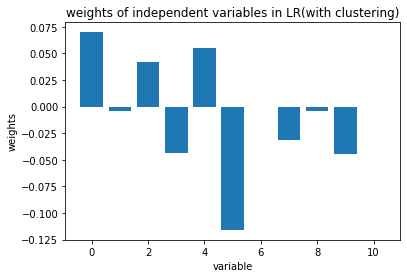

In [ ]:
from matplotlib import pyplot
importance = classifier.coef_[0]
importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in LR(with clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

In [ ]:
y_WC_pred = classifier.predict_proba(X_WC_test)[::,1]
fpr_LR_C, tpr_LR_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred)

### step 3-2-2: Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_WC_train, y_WC_train)

GaussianNB()

In [ ]:
y_WC_pred_NB = classifier.predict(X_WC_test)
print(np.concatenate((y_WC_pred_NB.reshape(len(y_WC_pred_NB),1), y_WC_test.reshape(len(y_WC_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WC_test, y_WC_pred_NB)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WC_test, y_WC_pred_NB))
print('precsion score = %.4f' %precision_score(y_WC_test, y_WC_pred_NB, average='binary'))
print('recall score = %.4f' %recall_score(y_WC_test, y_WC_pred_NB))
print('f1 score = %.4f' %f1_score(y_WC_test, y_WC_pred_NB))

confusion matrix : 
[[1721  270]
 [ 254  255]]
accuracy score = 0.7904
precsion score = 0.4857
recall score = 0.5010
f1 score = 0.4932


In [ ]:
y_WC_pred_NB = classifier.predict_proba(X_WC_test)[::,1]
fpr_NB_C, tpr_NB_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred_NB)

### step 3-2-2: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'n_estimators':[20,30,40,50,60,70,80,90,100], 'max_depth': [20,21,22,23,24]}
classifier = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid)   
classifier.fit(X_WC_train, y_WC_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 21, 22, 23, 24],
                         'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90, 100]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
classifier.best_params_
#classifier.best_score_

{'max_depth': 21, 'n_estimators': 80}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=21, n_estimators = 80, criterion = 'entropy', random_state = 0)
classifier.fit(X_WC_train, y_WC_train)

RandomForestClassifier(criterion='entropy', max_depth=21, n_estimators=80,
                       random_state=0)

In [ ]:
y_WC_pred_RF = classifier.predict(X_WC_test)
print(np.concatenate((y_WC_pred_RF.reshape(len(y_WC_pred_RF),1), y_WC_test.reshape(len(y_WC_test),1)),1))

[[1 0]
 [0 1]
 [0 0]
 ...
 [1 0]
 [0 0]
 [0 0]]


In [ ]:
cm = confusion_matrix(y_WC_test, y_WC_pred_RF)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WC_test, y_WC_pred_RF))
print('precsion score = %.4f' %precision_score(y_WC_test, y_WC_pred_RF, average='binary'))
print('recall score = %.4f' %recall_score(y_WC_test, y_WC_pred_RF))
print('f1 score = %.4f' %f1_score(y_WC_test, y_WC_pred_RF))

confusion matrix : 
[[1775  216]
 [ 182  327]]
accuracy score = 0.8408
precsion score = 0.6022
recall score = 0.6424
f1 score = 0.6217


In [ ]:
y_WC_pred_RF = classifier.predict_proba(X_WC_test)[::,1]
fpr_RF_C, tpr_RF_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred_RF)


Feature: 0, Score: 0.05980
Feature: 1, Score: 0.12911
Feature: 2, Score: 0.04993
Feature: 3, Score: 0.02448
Feature: 4, Score: 0.23623
Feature: 5, Score: 0.08654
Feature: 6, Score: 0.13004
Feature: 7, Score: 0.08799
Feature: 8, Score: 0.02065
Feature: 9, Score: 0.03405
Feature: 10, Score: 0.14121


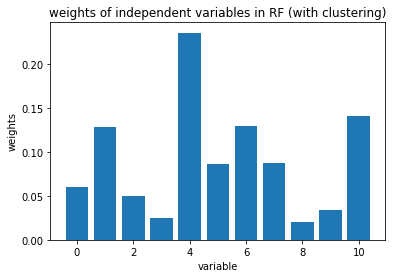

In [ ]:
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in RF (with clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()

### step 3-2-4: XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
param_grid={'max_depth':[21,22,23,24,25,26,27,28]}
classifier = GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid)   
classifier.fit(X_WC_train, y_WC_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': [21, 22, 23, 24, 25, 26, 27, 28]})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
print(classifier.best_params_)

{'max_depth': 26}


In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier(max_depth=26)
y_WC_pred_XG=xgb.fit(X_WC_train, y_WC_train).predict(X_WC_test)

In [ ]:

y_WC_pred_XG = xgb.predict(X_WC_test)
cm = confusion_matrix(y_WC_test, y_WC_pred_XG)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WC_test, y_WC_pred_XG))
print('precsion score = %.4f' %precision_score(y_WC_test, y_WC_pred_XG, average='binary'))
print('recall score = %.4f' %recall_score(y_WC_test, y_WC_pred_XG))
print('f1 score = %.4f' %f1_score(y_WC_test, y_WC_pred_XG))

confusion matrix : 
[[1786  205]
 [ 180  329]]
accuracy score = 0.8460
precsion score = 0.6161
recall score = 0.6464
f1 score = 0.6309


Feature: 0, Score: 0.02980
Feature: 1, Score: 0.02570
Feature: 2, Score: 0.05561
Feature: 3, Score: 0.04134
Feature: 4, Score: 0.09036
Feature: 5, Score: 0.02872
Feature: 6, Score: 0.04076
Feature: 7, Score: 0.52557
Feature: 8, Score: 0.02745
Feature: 9, Score: 0.10572
Feature: 10, Score: 0.02898


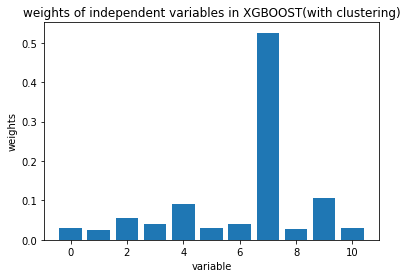

In [ ]:
importance = xgb.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('weights of independent variables in XGBOOST(with clustering)')
pyplot.xlabel('variable')
pyplot.ylabel('weights')
pyplot.show()

In [ ]:
y_WC_pred_XG = xgb.predict_proba(X_WC_test)[::,1]
fpr_XG_C, tpr_XG_C, _ = metrics.roc_curve(y_WC_test,  y_WC_pred_XG)

### step 3-2-6: SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid={'kernel':['rbf', 'linear']}
classifier = GridSearchCV(estimator=SVC(),param_grid=param_grid)   
classifier.fit(X_WC_train, y_WC_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear']})

In [ ]:
classifier.cv_results_
df=pd.DataFrame(classifier.cv_results_)
df[['params','mean_test_score']]
print(classifier.best_params_)

{'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_WC_train, y_WC_train)

SVC(random_state=0)

In [ ]:
y_WC_pred_svm = classifier.predict(X_WC_test)
print(np.concatenate((y_WC_pred_svm.reshape(len(y_WC_pred_svm),1), y_WC_test.reshape(len(y_WC_test),1)),1))

[[1 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_WC_test, y_WC_pred_svm)
print('confusion matrix : ')
print(cm)
print('accuracy score = %.4f' %accuracy_score(y_WC_test, y_WC_pred_svm))
print('precsion score = %.4f' %precision_score(y_WC_test, y_WC_pred_svm, average='binary'))
print('recall score = %.4f' %recall_score(y_WC_test, y_WC_pred_svm))
print('f1 score = %.4f' %f1_score(y_WC_test, y_WC_pred_svm))

confusion matrix : 
[[1738  253]
 [ 170  339]]
accuracy score = 0.8308
precsion score = 0.5726
recall score = 0.6660
f1 score = 0.6158


### step 3-2: ROC curve

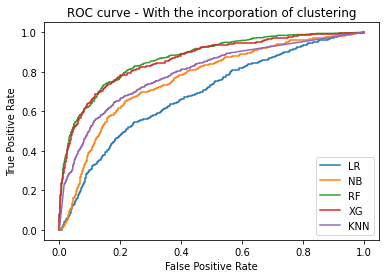

auc for LR without clustering = 0.6844
auc for NB without clustering = 0.7611
auc for RF without clustering = 0.8700
auc for XG without clustering = 0.8621
auc for KNN without clustering = 0.7936


In [ ]:
plt.plot(fpr_LR_C,tpr_LR_C,label="LR")
plt.plot(fpr_NB_C,tpr_NB_C,label="NB")
plt.plot(fpr_RF_C,tpr_RF_C,label="RF")
plt.plot(fpr_XG_C, tpr_XG_C,label="XG")
plt.legend()
plt.title('ROC curve - With the incorporation of clustering')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print('auc for LR without clustering = %.4f'%metrics.auc(fpr_LR_C,tpr_LR_C))
print('auc for NB without clustering = %.4f'%metrics.auc(fpr_NB_C,tpr_NB_C))
print('auc for RF without clustering = %.4f'%metrics.auc(fpr_RF_C,tpr_RF_C))
print('auc for XG without clustering = %.4f'%metrics.auc(fpr_XG_C,tpr_XG_C))
print('auc for KNN without clustering = %.4f'%metrics.auc(fpr_KNN_C,tpr_KNN_C))

# step 4: ROC curve comparison

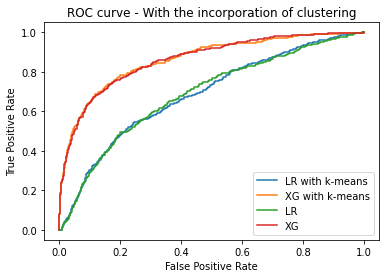

In [ ]:
plt.plot(fpr_LR_C,tpr_LR_C,label="LR with k-means")
plt.plot(fpr_XG_C, tpr_XG_C,label="XG with k-means")
plt.plot(fpr_LR,tpr_LR,label="LR")
plt.plot(fpr_XG, tpr_XG,label="XG")
plt.legend()
plt.title('ROC curve - With the incorporation of clustering')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

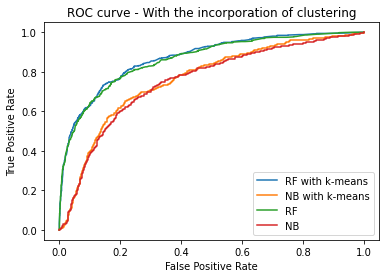

In [ ]:
plt.plot(fpr_RF_C,tpr_RF_C,label="RF with k-means")
plt.plot(fpr_NB_C,tpr_NB_C,label="NB with k-means")
plt.plot(fpr_RF,tpr_RF,label="RF")
plt.plot(fpr_NB,tpr_NB,label="NB")
plt.legend()
plt.title('ROC curve - With the incorporation of clustering')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()